In [1]:
import mesa_reader as mr
import matplotlib.pyplot as plt 
import numpy as np
from numpy.polynomial.polynomial import Polynomial

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [3]:
# make a MesaData object from a history file
h = mr.MesaData('history.data')

# load the last profile saved (largest model number)
l = mr.MesaLogDir('./')
p_last = l.profile_data()

radius_star = h.R[-1] #(in Rsun units)

# Normalised radius
radius_outer_norm = p_last.r_div_R # Normalised radius at outer boundary of zone
radius_norm =  p_last.rmid / radius_star # Normalised radius at center of zone

# Spatial domain selection 

In [4]:
#radius_min = 0.1
#index_radius_min = np.where(radius_norm < radius_min)[0][0]
index_radius_min = len(radius_norm) 
radius_max = 0.95
rmask = radius_norm < radius_max
radius_select = radius_norm[rmask]

LnT_select = np.log(p_last.T[rmask])
LnRho_select = np.log(p_last.Rho[rmask])
grav_select = p_last.grav[rmask]
Grun = p_last.gamma1 - 1 #Grüneisen parameter
Grun_select = Grun[rmask]
cp_select = p_last.cp[rmask]
N2_select = p_last.brunt_N2[rmask]

dlnT_dlnP = p_last.grada # dlnT_dlnP at constant S
alpha = (p_last.Rho * dlnT_dlnP * p_last.cp) / p_last.P
Lnalpha_select = np.log(alpha[rmask])

## Interpolation

In [5]:
polynomial_degree = 14

coeff_poly_LnT = Polynomial.fit(radius_select, LnT_select, polynomial_degree).convert().coef[::-1]
poly_LnT = np.poly1d(coeff_poly_LnT)

coeff_poly_LnRho = Polynomial.fit(radius_select, LnRho_select, polynomial_degree).convert().coef[::-1]
poly_LnRho = np.poly1d(coeff_poly_LnRho)

coeff_poly_grav = Polynomial.fit(radius_select, grav_select, polynomial_degree).convert().coef[::-1]
poly_grav = np.poly1d(coeff_poly_grav)

coeff_poly_Grun = Polynomial.fit(radius_select, 1./Grun_select, polynomial_degree).convert().coef[::-1]
poly_Grun = np.poly1d(coeff_poly_Grun)

coeff_poly_Lnalpha = Polynomial.fit(radius_select, Lnalpha_select, polynomial_degree).convert().coef[::-1]
poly_Lnalpha = np.poly1d(coeff_poly_Lnalpha)

coeff_poly_N2 = Polynomial.fit(radius_select, N2_select, polynomial_degree).convert().coef[::-1]
poly_N2 = np.poly1d(coeff_poly_N2)

# Temperature profile

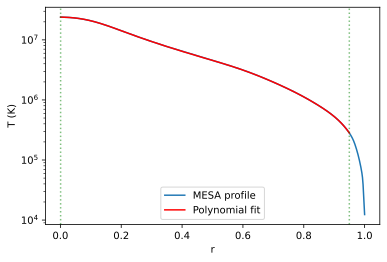

Coefficients of the polynomial (Ln): [ 1.69910204e+01 -3.45849423e-01  4.28533372e+00 -4.03218230e+02
  5.19064337e+03 -4.52068459e+04  2.74089611e+05 -1.13390059e+06
  3.21623694e+06 -6.30545791e+06  8.53073111e+06 -7.81852047e+06
  4.63524426e+06 -1.60410552e+06  2.46092522e+05]


In [6]:
plt.figure("T")
plt.semilogy(radius_norm, p_last.T, label = "MESA profile")
plt.semilogy(radius_select, np.exp(poly_LnT(radius_select)),"r", label = "Polynomial fit")
plt.xlabel("r")
plt.ylabel("T (K)")
plt.axvline(x = radius_select[0], linestyle=':', alpha=0.5, color = 'g')
plt.axvline(x = radius_select[-1], linestyle=':', alpha=0.5, color = 'g')
plt.legend()
plt.show()

print("Coefficients of the polynomial (Ln): " + str(np.flip(coeff_poly_LnT)))

# Density profile

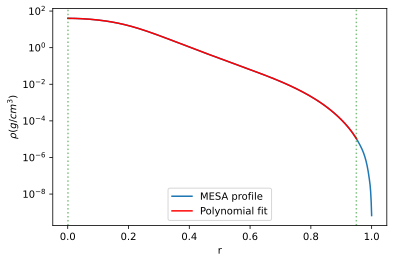

Coefficients of the polynomial (Ln) :[-4.06867603e+05  2.51576444e+06 -6.86689596e+06  1.08737357e+07
 -1.10398174e+07  7.49900396e+06 -3.45646712e+06  1.07943028e+06
 -2.28260951e+05  3.39431874e+04 -3.87234973e+03  3.19434447e+02
 -3.64525914e+01  2.86982785e-01  3.69064685e+00]


In [7]:
plt.figure("Rho")
plt.semilogy(radius_norm, p_last.Rho, label = "MESA profile")
plt.semilogy(radius_select, np.exp(poly_LnRho(radius_select)),"r", label = "Polynomial fit")
plt.xlabel("r")
plt.ylabel(r"$\rho (g/cm^3)$")
plt.legend()
plt.axvline(x = radius_select[0], linestyle=':', alpha=0.5, color = 'g')
plt.axvline(x = radius_select[-1], linestyle=':', alpha=0.5, color = 'g')
plt.show()
print("Coefficients of the polynomial (Ln) :" + str(coeff_poly_LnRho))

## Density scale height

The density scale height is where the density drops by a factor of $e$.

The quantity $N_\rho = \ln{\frac{\rho_i}{\rho_o}}$ gives the number of such drops.

$\rho_i$ is the density at the inner boundary (could be center or small core) and $\rho_o$ is the density at the outer boundary.



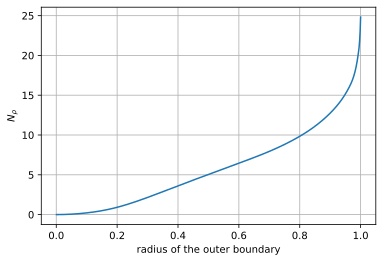

In [8]:
N_rho = np.log(p_last.Rho[index_radius_min-1]/p_last.Rho)
plt.plot(radius_norm, N_rho)
plt.xlabel("radius of the outer boundary")
plt.ylabel(r"$N_\rho$")
plt.grid()
plt.show()

# Gravitational acceleration profile

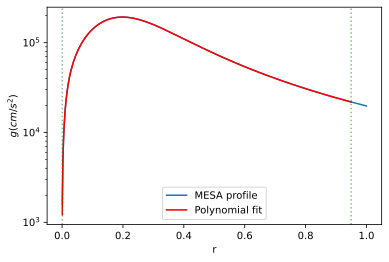

Coefficients of the polynomial: [-2.26143532e+02  1.84668067e+06 -7.46093335e+06  6.09516538e+07
 -2.89932319e+08 -1.28360281e+09  1.87711700e+10 -8.91090649e+10
  2.44327981e+11 -4.36254113e+11  5.26247737e+11 -4.27715620e+11
  2.25236032e+11 -6.95723140e+10  9.58641020e+09]


In [9]:
plt.figure("Rho")
plt.semilogy(radius_norm, p_last.grav, label = "MESA profile")
plt.semilogy(radius_select, poly_grav(radius_select),"r", label = "Polynomial fit")
plt.xlabel("r")
plt.ylabel(r"$g (cm/s^2)$")
plt.legend()
plt.axvline(x = radius_select[0], linestyle=':', alpha=0.5, color = 'g')
plt.axvline(x = radius_select[-1], linestyle=':', alpha=0.5, color = 'g')
plt.show()

print("Coefficients of the polynomial: " + str(np.flip(poly_grav.coefficients)))

# Grüneisen parameter profile

 The Grüneisen parameter is defined as $$\Gamma=\left(\frac{\partial \ln P}{\partial \ln \rho}\right)_S-1.$$

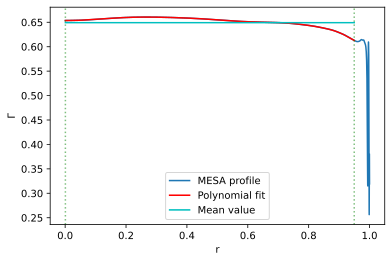

Coefficients of the polynomial: [ 1.53007987e+00 -4.73784300e-02  1.97390497e+00 -5.51951109e+01
  6.43486731e+02 -4.59582348e+03  2.24408131e+04 -7.67613629e+04
  1.84088083e+05 -3.06969772e+05  3.49422851e+05 -2.61914368e+05
  1.20579307e+05 -2.94678982e+04  2.58804564e+03]


0.6491803054143837

In [10]:
plt.figure("Rho")
plt.plot(radius_norm, Grun, label = "MESA profile")
plt.plot(radius_select, 1./poly_Grun(radius_select),"r", label = "Polynomial fit")
plt.plot(radius_select, np.mean(Grun_select)*np.ones_like(radius_select),"c", label = "Mean value")
plt.xlabel("r")
plt.ylabel(r"$\Gamma$")
plt.legend()
plt.axvline(x = radius_select[0], linestyle=':', alpha=0.5, color = 'g')
plt.axvline(x = radius_select[-1], linestyle=':', alpha=0.5, color = 'g')
plt.show()

print("Coefficients of the polynomial: " + str(np.flip(poly_Grun.coefficients)))
np.mean(Grun_select)

# Thermal expansion coefficient profile

$$\alpha=-\frac{1}{\rho}\left(\frac{\partial \rho}{\partial T}\right)_{p}$$

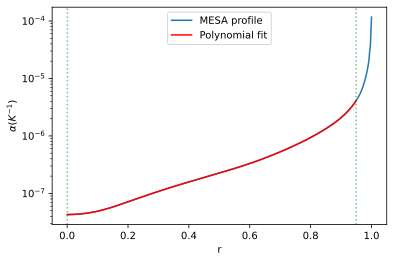

Coefficients of the polynomial (Ln): [-1.69669886e+01  2.25126880e-01  2.26338090e+00  2.35294652e+02
 -3.00070387e+03  2.75895814e+04 -1.79214950e+05  7.79563367e+05
 -2.28364507e+06  4.56873139e+06 -6.25991462e+06  5.78222220e+06
 -3.44371209e+06  1.19453762e+06 -1.83388664e+05]


In [11]:
plt.figure("alpha")
plt.semilogy(radius_norm, alpha, label = "MESA profile")
plt.semilogy(radius_select, np.exp(poly_Lnalpha(radius_select)),"r", label = "Polynomial fit")
plt.xlabel("r")
plt.ylabel(r"$\alpha (K^{-1})$")
plt.legend()
plt.axvline(x = radius_select[0], linestyle=':', alpha=0.5, color = 'g')
plt.axvline(x = radius_select[-1], linestyle=':', alpha=0.5, color = 'g')
plt.show()

print("Coefficients of the polynomial (Ln): " + str(np.flip(poly_Lnalpha.coefficients)))

# Brunt-vaisala frequency squared profile

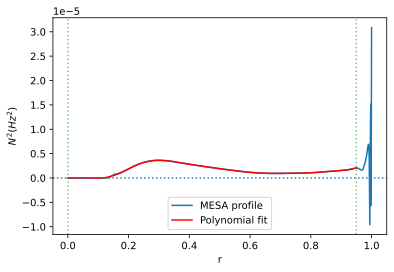

Coefficients of the polynomial: [ 3.76177111e-08 -1.20204939e-05  6.18515759e-04 -1.06002837e-02
  5.43441937e-02  3.08782835e-01 -5.02559067e+00  2.75626059e+01
 -8.68880616e+01  1.76580778e+02 -2.39829157e+02  2.17205801e+02
 -1.26248914e+02  4.26749906e+01 -6.38558383e+00]


In [12]:
plt.figure("N2")
plt.plot(radius_norm, p_last.brunt_N2, label = "MESA profile")
plt.plot(radius_select, poly_N2(radius_select),"r", label = "Polynomial fit")
plt.xlabel("r")
plt.ylabel(r"$N^2(Hz^2)$")
plt.axvline(x = radius_select[0], linestyle=':', alpha=0.5, color = 'g')
plt.axvline(x = radius_select[-1], linestyle=':', alpha=0.5, color = 'g')

plt.axhline(y = 0, ls=':')

plt.legend()
plt.show()

print("Coefficients of the polynomial: " + str(np.flip(coeff_poly_N2)))

In [13]:
mask = (p_last.brunt_N2 < 0) & (radius_norm < radius_max)
rad_conv = radius_norm[mask]
rad_conv

array([0.12860978, 0.12746461, 0.12630918, 0.12514339, 0.12396676,
       0.12277915, 0.12158007, 0.12067171, 0.12006452, 0.11914647,
       0.11791121, 0.11666298, 0.11571652, 0.11508392, 0.11412636,
       0.11283706, 0.11153295, 0.11054306, 0.10988149, 0.10887872,
       0.10752746, 0.10615906, 0.10511902, 0.10442401, 0.10336884,
       0.10194555, 0.10050214, 0.09903817, 0.09755224, 0.09642   ,
       0.09566353, 0.09451136, 0.09295416, 0.09137038, 0.09016082,
       0.08935286, 0.08811866, 0.08644756, 0.08474339, 0.08343795,
       0.08256617, 0.08122926, 0.07941469, 0.07755737, 0.07612868,
       0.07517495, 0.07370427, 0.07170117, 0.06963988, 0.06804452,
       0.06698014, 0.06532502, 0.06309715, 0.0608304 , 0.05902093,
       0.05775615, 0.05575805, 0.05310821, 0.05045496, 0.04827507,
       0.04671223, 0.04416386, 0.04064827, 0.03690837, 0.03325322,
       0.02985582, 0.02525533, 0.02022617, 0.0164314 , 0.01315623,
       0.01062535, 0.00871279, 0.0073218 , 0.00636709, 0.00552

# Specific heat at constant total pressure profile

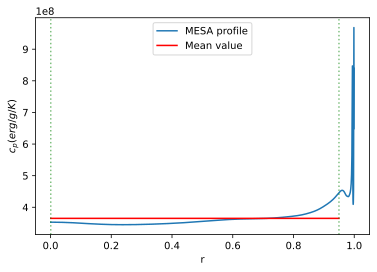

mean value of cp =364857398.80873036 erg/g/K =36485.739880873036 J/kg/K


In [14]:
plt.figure("cp")
plt.plot(radius_norm, p_last.cp, label = "MESA profile")
plt.plot(radius_select, np.mean(cp_select)*np.ones_like(radius_select),"r", label = "Mean value")
plt.xlabel("r")
plt.ylabel(r"$c_p (erg/g/K)$")
plt.axvline(x = radius_select[0], linestyle=':', alpha=0.5, color = 'g')
plt.axvline(x = radius_select[-1], linestyle=':', alpha=0.5, color = 'g')
plt.legend()
plt.show()
print("mean value of cp =" + str(np.mean(cp_select)) + " erg/g/K =" + str(np.mean(cp_select)*10**(-4)) + " J/kg/K")

# Comparison with profiles from MagIC

In [15]:
import pandas as pd

r_cut_model = 0.9

T_rho_profiles_from_MESA = True # use the temperature and density profiles from MESA directly in MagIC
if (T_rho_profiles_from_MESA):
    df = pd.read_csv('anel_mesa.test',delim_whitespace=True)
    df2 = pd.read_csv('complementary_data_mesa.dat',delim_whitespace=True)
else:
    df = pd.read_csv('anel_thermo.test',delim_whitespace=True)
    df2 = pd.read_csv('complementary_data_thermo.dat',delim_whitespace=True)     
r = df['radius'] * r_cut_model
df

,radius,temp0,rho0,beta,dbeta,grav,ds0/dr,div(kgradT),alpha,ogrun,dLtemp0
0,1.000000,1.000000,1.000000,-38.311796,-265.768422,1.000000,39.441654,1.287519e+03,1.000000,1.540404,-9.657721
1,0.999398,1.005237,1.020944,-38.168384,-263.390690,1.000773,39.366961,1.311375e+03,0.994348,1.540404,-9.614235
2,0.997592,1.020957,1.085890,-37.746041,-256.539813,1.003115,39.147331,1.385373e+03,0.977750,1.540404,-9.487280
3,0.994588,1.047198,1.201451,-37.066920,-245.994498,1.007096,38.794352,1.517157e+03,0.951219,1.540404,-9.286956
4,0.990393,1.084035,1.379574,-36.163396,-232.845333,1.012831,38.321976,1.720690e+03,0.916268,1.540404,-9.028720
...,...,...,...,...,...,...,...,...,...,...,...
60,0.009607,45.041347,343336.357000,-0.280882,-59.404468,0.582191,-0.707437,-4.432762e+09,0.020585,1.540404,-0.349946
61,0.005412,45.098908,343551.130000,-0.047072,-64.597849,0.328930,-0.198036,-6.802964e+09,0.020563,1.540404,-0.330525
62,0.002408,45.139215,343511.974000,0.133352,-68.963565,0.143146,0.381957,-1.499139e+10,0.020549,1.540404,-0.332751
63,0.000602,45.163913,343405.857000,0.247744,-71.879842,0.029570,0.831579,-6.195773e+10,0.020541,1.540404,-0.341556


## Temperature

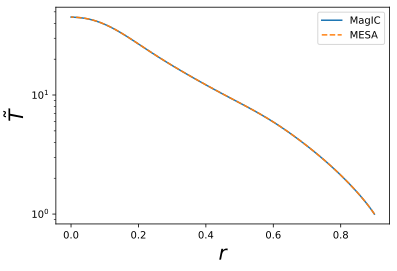

In [16]:
temp0_mesa = np.exp(poly_LnT(r))
temp0_mesa /= temp0_mesa[0]

plt.semilogy(r,df['temp0'],label='MagIC')
plt.semilogy(r,temp0_mesa,label='MESA',linestyle='dashed')
plt.xlabel(r'$r$',fontsize=20)
plt.ylabel(r'$\tilde{T}$',fontsize=20)
plt.legend()
plt.show()

## Temperature gradient, $\frac{d\ln\tilde{T}}{dr}$

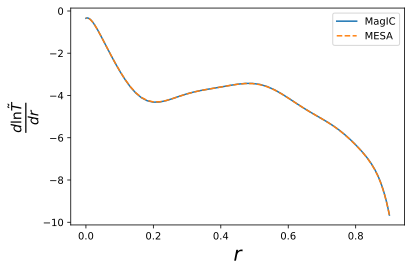

In [17]:
Ltemp0_mesa = poly_LnT(r)
Ltemp0_mesa -= Ltemp0_mesa[0]
dLtemp0_mesa = np.gradient(Ltemp0_mesa,r)

plt.plot(r,df['dLtemp0'],label='MagIC')
plt.plot(r,dLtemp0_mesa,label='MESA',linestyle='dashed')
plt.xlabel(r'$r$',fontsize=20)
plt.ylabel(r'$\frac{d\ln\tilde{T}}{dr}$',fontsize=20)
plt.legend()
plt.show()

## Second derivative of the temperature, $\frac{d^2\ln\tilde{T}}{dr^2}$

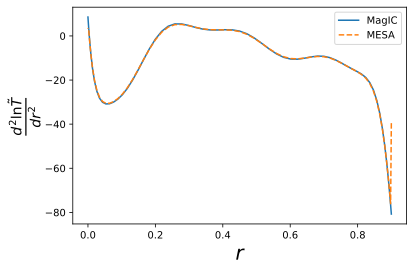

In [18]:
ddLtemp0_mesa = np.gradient(dLtemp0_mesa,r)

plt.plot(r,df2['ddLtemp0'],label='MagIC')
plt.plot(r,ddLtemp0_mesa,label='MESA',linestyle='dashed')
plt.xlabel(r'$r$',fontsize=20)
plt.ylabel(r'$\frac{d^2\ln\tilde{T}}{dr^2}$',fontsize=20)
plt.legend()
plt.show()

## Density

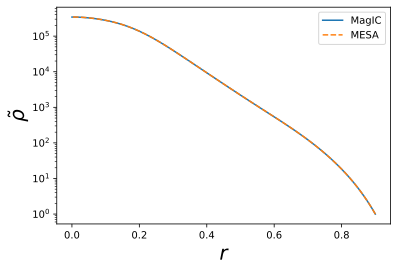

In [19]:
rho0_mesa = np.exp(poly_LnRho(r))
rho0_mesa /= rho0_mesa[0]

plt.semilogy(r,df['rho0'],label='MagIC')
plt.semilogy(r,rho0_mesa,label='MESA',linestyle='dashed')
plt.xlabel(r'$r$',fontsize=20)
plt.ylabel(r'$\tilde{\rho}$',fontsize=20)
plt.legend()
plt.show()

## Thermal expansion coefficient, $\alpha$

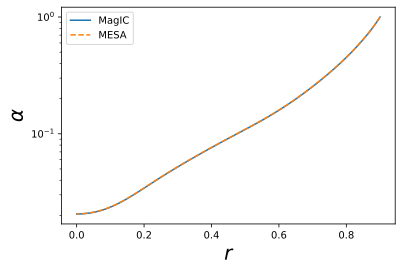

In [20]:
alpha0_mesa = np.exp(poly_Lnalpha(r))
alpha0_mesa /= alpha0_mesa[0]

plt.semilogy(r,df['alpha'],label='MagIC')
plt.semilogy(r,alpha0_mesa,label='MESA',linestyle='dashed')
plt.xlabel(r'$r$',fontsize=20)
plt.ylabel(r'$\alpha$',fontsize=20)
plt.legend()
plt.show()


## Thermal expansion coefficient gradient, $\frac{d\ln\alpha}{dr}$


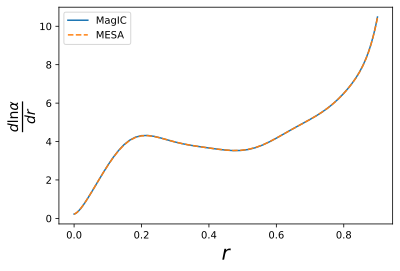

In [21]:
Lalpha0_mesa = poly_Lnalpha(r)
Lalpha0_mesa -= Lalpha0_mesa[0]
dLalpha0_mesa = np.gradient(Lalpha0_mesa,r)

plt.plot(r,df2['dLalpha0'],label='MagIC')
plt.plot(r,dLalpha0_mesa,label='MESA',linestyle='dashed')
plt.xlabel(r'$r$',fontsize=20)
plt.ylabel(r'$\frac{d\ln\alpha}{dr}$',fontsize=20)
plt.legend()
plt.show()

## Second derivative of the thermal expansion coefficient, $\frac{d^2\alpha}{dr^2}$

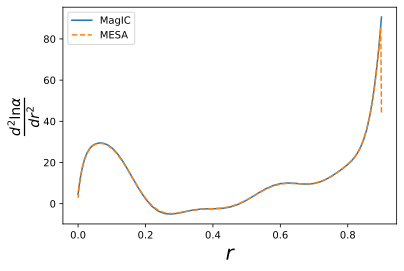

In [22]:
ddLalpha0_mesa = np.gradient(dLalpha0_mesa,r)

plt.plot(r,df2['ddLalpha0'],label='MagIC')
plt.plot(r,ddLalpha0_mesa,label='MESA',linestyle='dashed')
plt.xlabel(r'$r$',fontsize=20)
plt.ylabel(r'$\frac{d^2\ln\alpha}{dr^2}$',fontsize=20)
plt.legend()
plt.show()

## Gravity, $g$

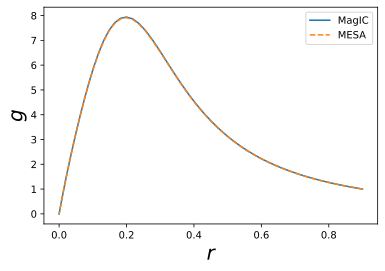

In [23]:
grav_mesa = poly_grav(r)
grav_mesa /= grav_mesa[0]

grav_magic = df['grav']/(df['alpha'] * df['temp0'])

plt.plot(r,grav_magic,label='MagIC')
plt.plot(r,grav_mesa,label='MESA',linestyle='dashed')
plt.xlabel(r'$r$',fontsize=20)
plt.ylabel(r'$g$',fontsize=20)
plt.legend()
plt.show()

## Density gradient, $\beta = \frac{d\ln\tilde{\rho}}{dr}$

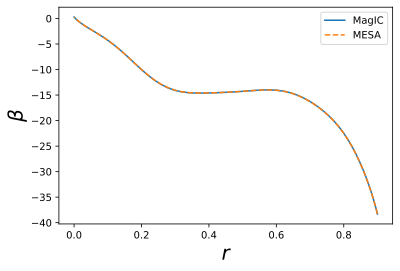

In [24]:
lnRho = poly_LnRho(r)
beta_mesa = np.gradient(lnRho,r)

plt.plot(r,df['beta'],label='MagIC')
plt.plot(r,beta_mesa,label='MESA',linestyle='dashed')
plt.xlabel(r'$r$',fontsize=20)
plt.ylabel(r'$\beta$',fontsize=20)
plt.legend()
plt.show()

## Gradient of beta, $\frac{d\beta}{dr} = \frac{d^2 \ln\tilde{\rho}}{dr^2}$

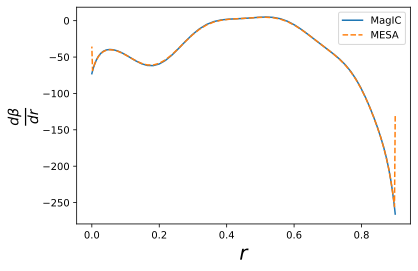

In [25]:
dbeta_mesa = np.gradient(beta_mesa,r)

plt.plot(r,df['dbeta'],label='MagIC')
plt.plot(r,dbeta_mesa,label='MESA',linestyle='dashed')
plt.xlabel(r'$r$',fontsize=20)
plt.ylabel(r'$\frac{d\beta}{dr}$',fontsize=20)
plt.legend()
plt.show()

## Second derivative of beta, $\frac{d^2\beta}{dr^2} = \frac{d^3 \ln\tilde{\rho}}{dr^3}$

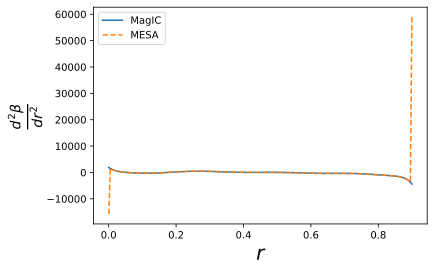

In [26]:
ddbeta_mesa = np.gradient(dbeta_mesa,r)

plt.plot(r,df2['ddbeta'],label='MagIC')
plt.plot(r,ddbeta_mesa,label='MESA',linestyle='dashed')
plt.xlabel(r'$r$',fontsize=20)
plt.ylabel(r'$\frac{d^2\beta}{dr^2}$',fontsize=20)
plt.legend()
plt.show()

## Entropy gradient, $\frac{d\tilde{s}}{dr}$

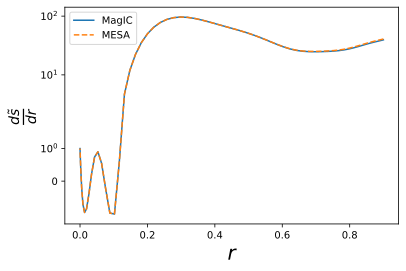

In [27]:
dsdr_mesa = poly_N2(r)
dsdr_mesa /= dsdr_mesa[-1]

plt.plot(r,df['ds0/dr'],label='MagIC')
plt.plot(r,dsdr_mesa,label='MESA',linestyle='dashed')
plt.xlabel(r'$r$',fontsize=20)
plt.ylabel(r'$\frac{d\tilde{s}}{dr}$',fontsize=20)
plt.yscale('symlog')
plt.legend()
plt.show()